In [2]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
init_printing(use_unicode=True)


In [131]:
# Fourier Spectral Methods
# a)
x = symbols('x')
print('a0:')
integrate(1/(2-cos(pi*x)), (x, 0, 2))
# print('a1')
# integrate(cos(x)/(2-cos(pi*x)), (x, 0, 2))


a0:


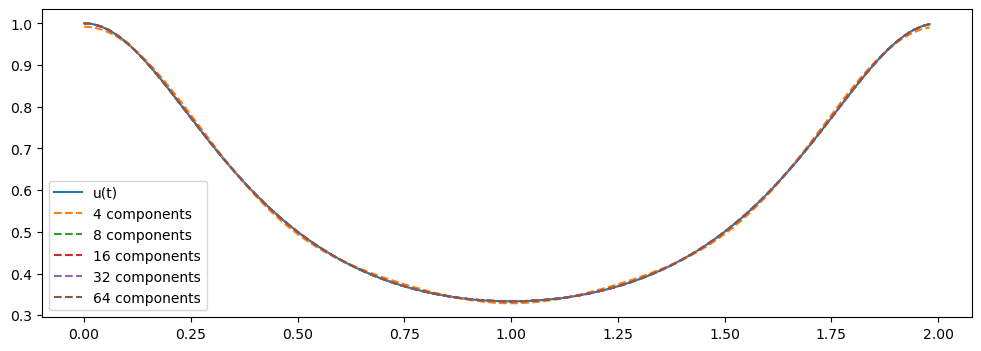

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to approximate
def u(x):
    #return abs(x-1) + abs(x) # sanity check
    return 1/(2-np.cos(x*np.pi))

# Number of sample points
N = 100
# Sample spacing
x = np.linspace(0.0, 2, N, endpoint=False) #change 2 to eg. 0.1 to zoom in
y = u(x)

# Compute the Fourier coefficients
yf = np.fft.fft(y)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='u(t)')

Ns = [4,8,16,32,64] # Number of coefficients to keep
for num_coefficients in Ns: 
    # Zero out higher-order coefficients
    yf_truncated = np.zeros_like(yf)
    yf_truncated[:num_coefficients] = yf[:num_coefficients]
    yf_truncated[-num_coefficients+1:] = yf[-num_coefficients+1:]

    # Reconstruct the function using the truncated Fourier coefficients
    y_reconstructed = np.fft.ifft(yf_truncated)
    plt.plot(x, y_reconstructed.real, label=f'{num_coefficients} components', linestyle='--')

# Plot the original and reconstructed functions

ax.legend()
plt.show()
